In [74]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from joblib import dump, load

## 0.0 Get Data

In [108]:
df_test = pd.read_csv('../data/processed/test_scaled.csv',index_col=False)

In [109]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,...,Garage Finish_Unf,Garage Finish_None,Garage Finish_Fin,Garage Finish_RFn,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Age of Remodel,Total Bath,Sum Qual
0,0,-1.730081,2658,902301120,190,RM,-0.029251,-0.119395,Pave,Grvl,...,1.140635,-0.232286,-0.576037,-0.600567,-0.282582,-0.163918,0.333544,1.593181,-0.259157,-0.992884
1,1,-1.726140,2718,905108090,90,RL,-0.001151,-0.067611,Pave,NaN,...,-0.876705,-0.232286,1.736001,-0.600567,-0.282582,-0.163918,0.333544,0.274485,-0.259157,-0.992884
2,2,-1.722200,2414,528218130,60,RL,-0.544416,0.673505,Pave,NaN,...,-0.876705,-0.232286,-0.576037,1.665092,-0.282582,-0.163918,0.333544,-1.141892,1.597900,1.150067
3,3,-1.718259,1989,902207150,30,RM,-0.450749,-0.181337,Pave,NaN,...,1.140635,-0.232286,-0.576037,-0.600567,3.538796,-0.163918,-2.998105,-1.093051,-1.497195,-0.992884
4,4,-1.714318,625,535105100,20,RL,-0.001151,-0.083744,Pave,NaN,...,-0.876705,-0.232286,-0.576037,1.665092,-0.282582,-0.163918,0.333544,1.104775,0.359862,0.924493


### 0.1 Prep data to fit model

In [110]:
num_col = df_test._get_numeric_data().drop(['Id', 'PID', 'Unnamed: 0','Unnamed: 0.1'], axis=1).columns.tolist()

In [111]:
num_col.remove('Garage Cars')
len(num_col)

176

In [112]:
num_col.remove('Garage Area')

## 1.0 Predictions

In [113]:
# Load saved model
regr = load('../models/elasticnet011519_0_area2.sav')

In [114]:
predictions = regr.predict(df_test[num_col])

In [115]:
predictions_log = np.expm1(predictions)

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


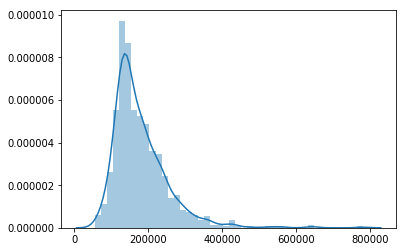

In [116]:
sns.distplot(predictions_log);

In [117]:
regr2 = load('../models/ENGS011519_area2.sav')

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


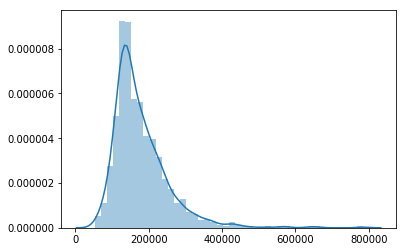

In [118]:
predictions2 = regr2.predict(df_test[num_col])
predictions_log2 = np.expm1(predictions2)
sns.distplot(predictions_log2);

## 2.0 Submissions

In [123]:
df_submission = pd.DataFrame()

In [124]:
df_submission['SalePrice'] = predictions_log

In [125]:
df_submission['Id'] = df_test['Id']

In [126]:
# Create CSV for Kaggle submission
df_submission.to_csv("../data/external/submission_ENCV_011719_area.csv", index=False)